In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../Data/BodyFat/bodyfat.csv')
df.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [4]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [5]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


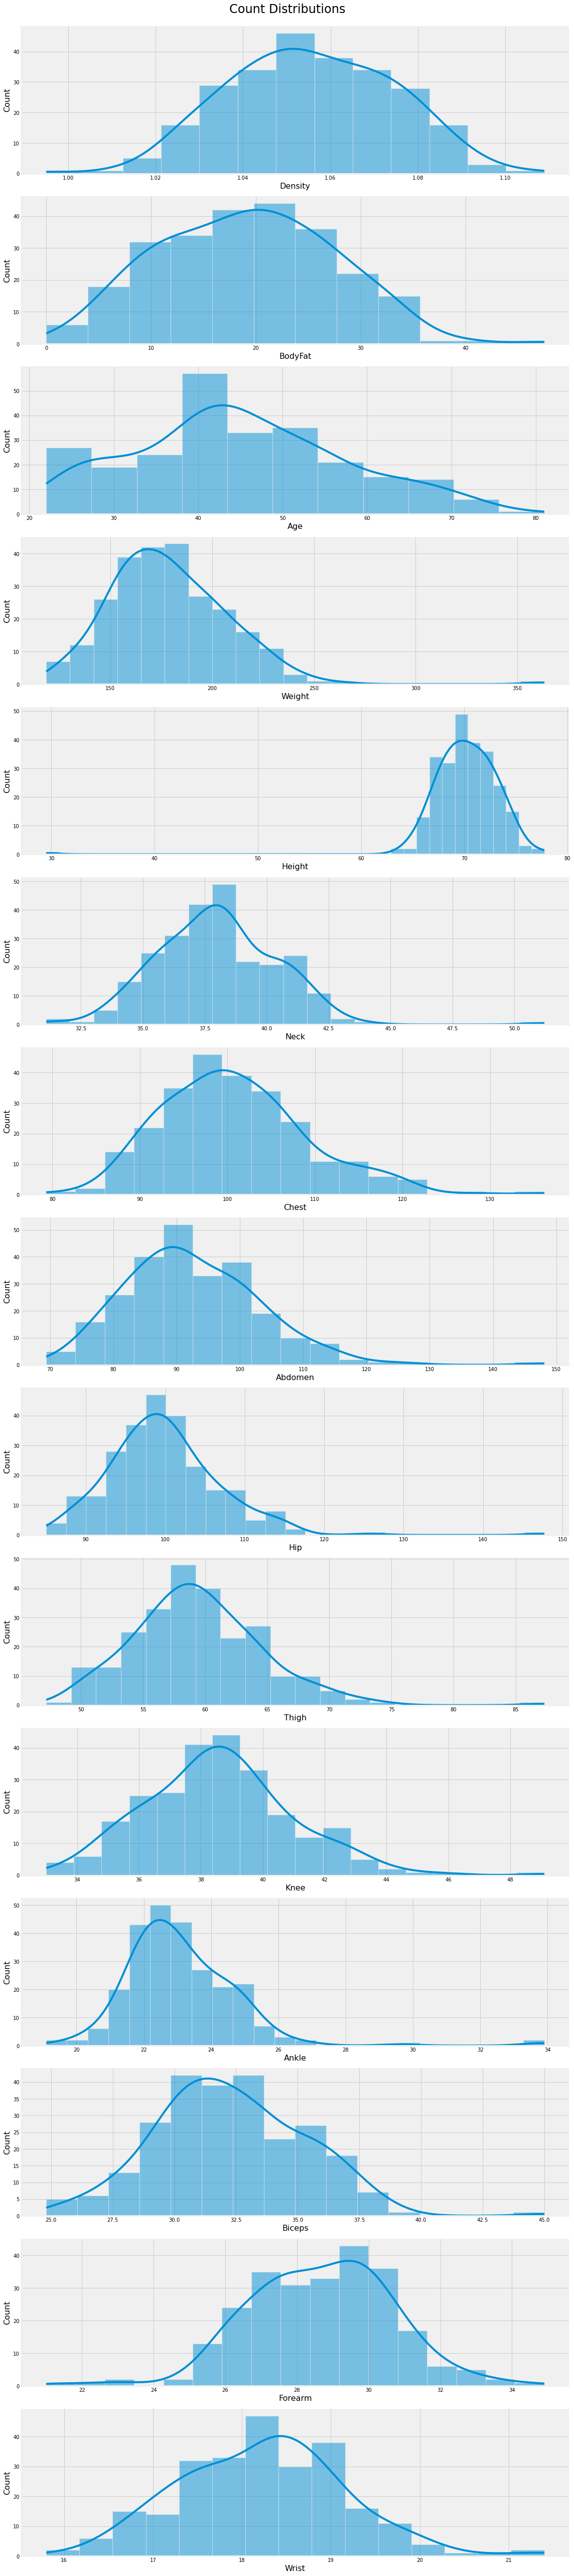

In [6]:
fig, ax = plt.subplots(15, 1, figsize=(16, 75))

for idx, i in enumerate(df.columns):
    sns.histplot(df[i], kde=True, ax=ax[idx])
    ax[idx].set_xlabel(i, fontsize=16)
    ax[idx].set_ylabel('Count', fontsize=16)
    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
fig.suptitle('Count Distributions', fontsize=24)
fig.tight_layout(rect=[0,0.03, 1, .98])
plt.show()

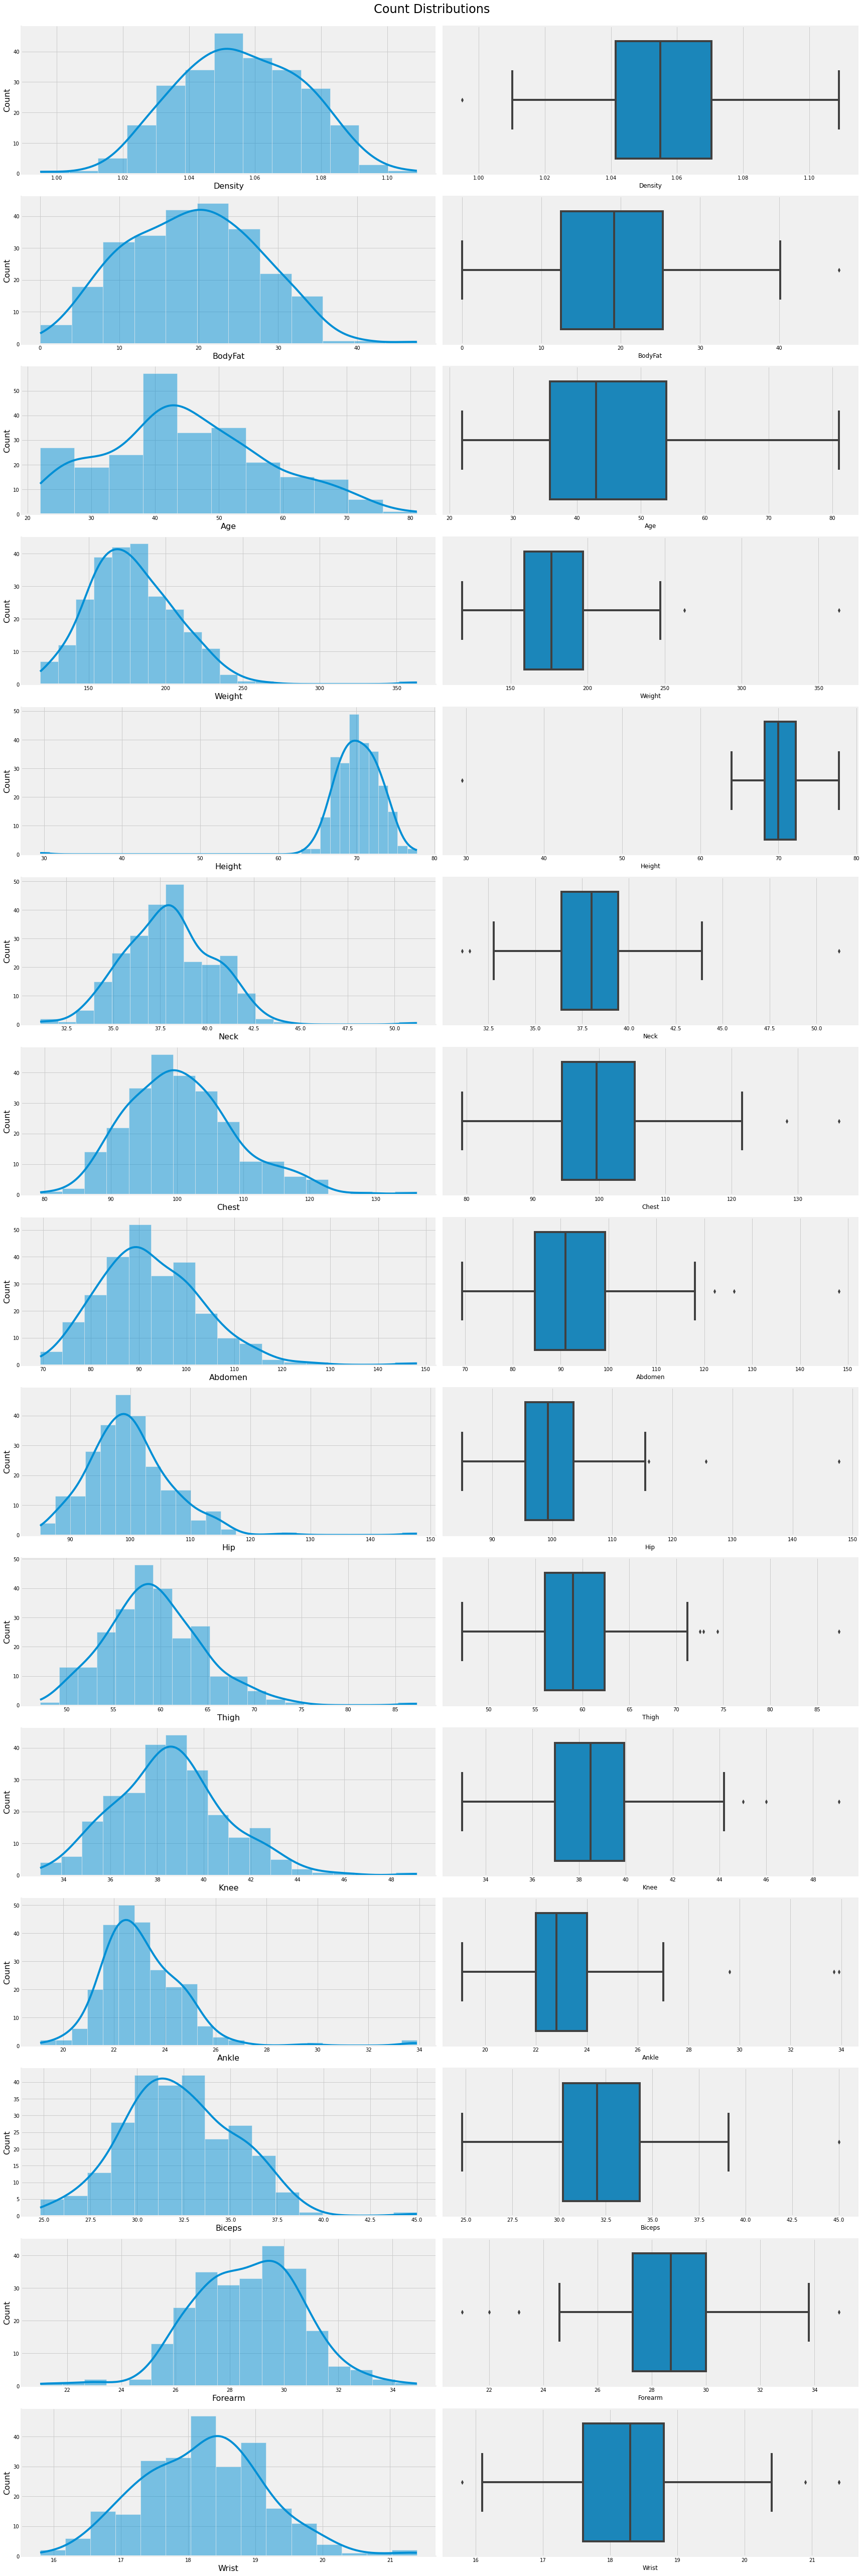

In [7]:
fig, ax = plt.subplots(15, 2, figsize=(24, 75))
for idx, i in enumerate(df.columns):
    sns.histplot(df[i], kde=True, ax=ax[idx, 0])
    sns.boxplot(x= df[i], ax=ax[idx, 1])
    ax[idx, 0].set_xlabel(i, fontsize=16)
    ax[idx, 0].set_ylabel('Count', fontsize=16)
    ax[idx, 0].spines['top'].set_visible(False)
    ax[idx, 0].spines['right'].set_visible(False)
fig.suptitle('Count Distributions', fontsize=24)
fig.tight_layout(rect=[0,0.03, 1, .98])
plt.show()

In [8]:
df.skew(axis=0).sort_values()

Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64

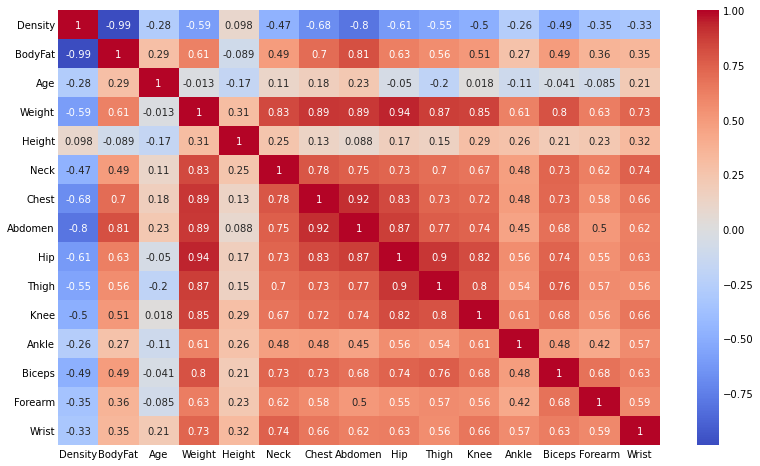

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### We observe a high degree of multicollinearity in the data set.

# Feature Engineering and PCA

In [10]:
X = df.drop(['Density', 'BodyFat'], axis=1)
y = df['Density']

##### We drop all outliers with a z score < 3

In [118]:
X = X[(z < 3).all(axis=1)]
y = y[(z < 3).all(axis=1)]

In [119]:
print(f'X: {X.shape}\ny: {y.shape}')

X: (243, 15)
y: (243,)


In [121]:
X.iloc[41]

Age                   43
Weight            164.25
Height             73.25
Neck                35.7
Chest               96.6
Abdomen             81.5
Hip                 97.2
Thigh               58.4
Knee                38.2
Ankle               23.4
Biceps              29.7
Forearm             27.4
Wrist               18.3
BMI            21.520157
BMICategory      Nominal
Name: 45, dtype: object

In [ ]:
# Using Stratified Shuffle Split

### BMI

In [11]:
# BMI
X['BMI'] = 703 * X['Weight'] / (X['Height']*X['Height'])
X.head(3)

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315


In [12]:
# BMI Category
X['BMICategory'] = pd.cut(X['BMI'], [0, 18.5,24.9,29.9,34.9,float('inf')], labels=['Underweight', 'Nominal', 'Overweight', 'Obese', 'Extremely Obese'])

<AxesSubplot:>

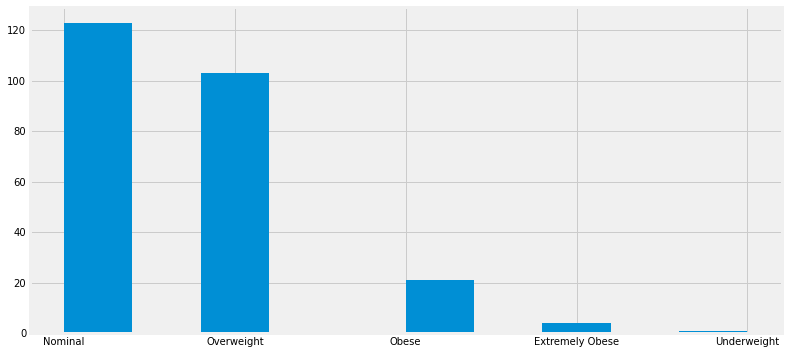

In [13]:
X['BMICategory'].hist(figsize=(12,6))

In [14]:
# Just curious about BMICategory spread with relation to BodyFat
temp_df = df.copy()
temp_df = temp_df.merge(X['BMICategory'], left_index=True, right_index=True)

In [15]:
z = np.abs(stats.zscore(X.iloc[:, :-1]))


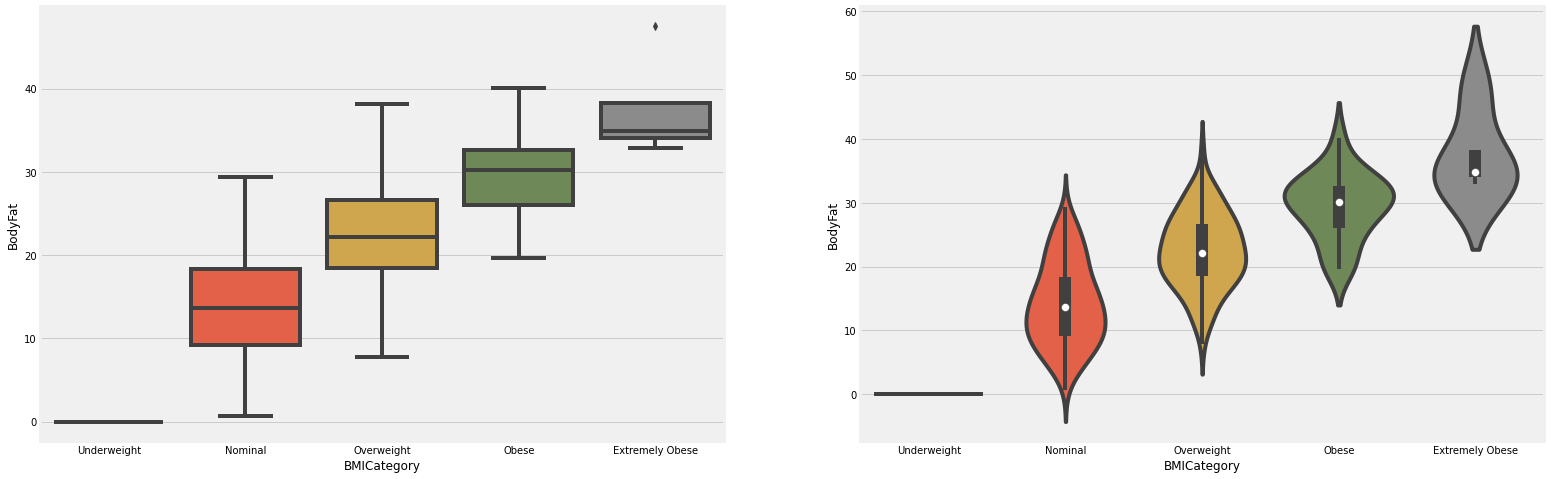

In [16]:
fig, axs = plt.subplots(1,2, figsize=(24,8))
sns.boxplot(x=temp_df['BMICategory'], y=temp_df['BodyFat'], ax=axs[0])
sns.violinplot(x=temp_df['BMICategory'], y=temp_df['BodyFat'], ax=axs[1])
plt.show()

In [17]:
temp_df = temp_df.merge(X['BMI'], left_index=True, right_index=True)

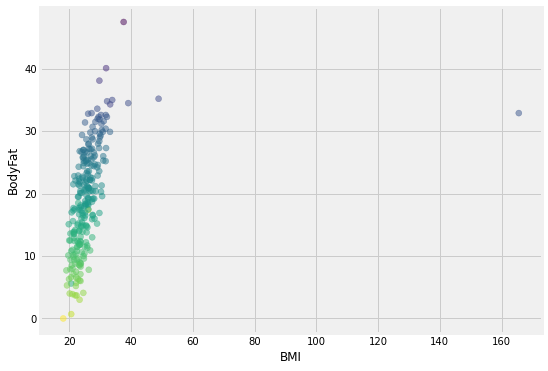

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x=temp_df['BMI'], y=temp_df['BodyFat'], c=temp_df['Density'],alpha=0.5)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('BodyFat')
plt.show()

__Observation:__ BMICategory appears ordinal. The overlap in categories in the first and third quantiles makes me think that RForest would be good if the dataset was large.<br>
Given the small sample size of our dataset however, RForest would be difficult to regularize.

### Chest - Abdomen Ratio

In [129]:
X['ChestOverAbdomen'] = X['Chest'] / X['Abdomen']
X['ChestOverAbdomen'].head()

0    1.092723
1    1.127711
2    1.089875
3    1.178241
4    0.973000
Name: ChestOverAbdomen, dtype: float64

In [115]:
CA_df = X.groupby('BMICategory')[['Chest', 'Abdomen']].median()
CA_df

,Chest,Abdomen
BMICategory,,
Underweight,79.30,69.40
Nominal,94.40,84.60
Overweight,104.00,97.50
Obese,114.90,110.30
Extremely Obese,124.05,124.15


In [175]:
CA_df.loc[row][0]/ CA_df.loc[row][1]

numpy.float64

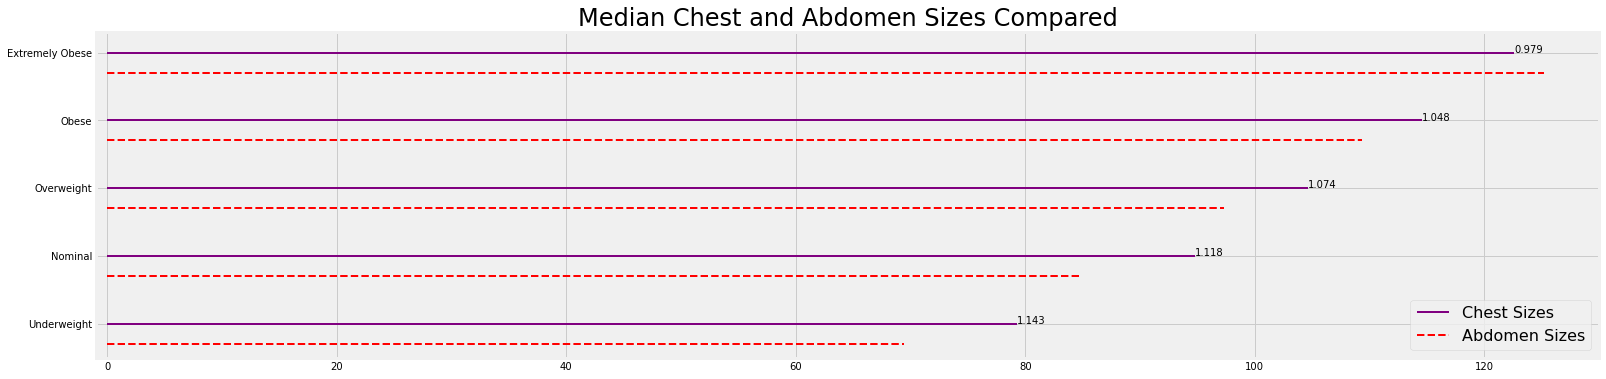

In [178]:
plt.figure(figsize=(24,6))
# plt.hlines(y=39.5, xmin=100, xmax=175, colors='aqua', linestyles='-', lw=2, label='Single Short Line')

xs = np.linspace(1, 21, 200)
plt.hlines(y=CA_df.index, xmin=CA_df['Chest'].apply(lambda x: x - x), xmax=CA_df['Chest'],
           colors='purple', linestyles='-', lw=2, label='Chest Sizes')
abs = plt.hlines(y=CA_df.index, xmin=CA_df['Abdomen'].apply(lambda x: x - x), xmax=CA_df['Abdomen'], colors='red', linestyles='--', lw=2, label='Abdomen Sizes', alpha=1, offsets=(0,-20))
for idx, row in enumerate(CA_df.index):
    plt.text(CA_df.iloc[idx, 0], row, np.format_float_positional(np.float16(CA_df.loc[row][0]/CA_df.loc[row][1])))

plt.legend(loc='lower right',fontsize=16)
plt.axis([-1, 130, -0.5, 4.3])
plt.title('Median Chest and Abdomen Sizes Compared', fontsize=24)
plt.show()

# Dealing with Multicollinarity
Higly multicollinarity requires some form of reduction.
Options:
* Remove highly correlated independant variables
* Linearly combine the independent variables
* PCA
* Partial Least Squares Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
